<a href="https://colab.research.google.com/github/Luiz-FIAP/Fase_06_Cap_1_Despertar_da_Rede_Neural/blob/main/treino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive # Vincluar ao Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
! git clone https://github.com/ultralytics/yolov5.git # Clonar repositório YOLO

Cloning into 'yolov5'...
remote: Enumerating objects: 17582, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17582 (delta 0), reused 0 (delta 0), pack-reused 17579 (from 2)
Receiving objects: 100% (17582/17582), 16.83 MiB | 24.47 MiB/s, done.
Resolving deltas: 100% (11978/11978), done.


In [33]:
! pip install -r yolov5/requirements.txt # Baixar requirements do YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.9 MB/s eta 0:00:00


In [34]:
! cp /content/drive/MyDrive/FIAP/Tarefa_Cap_1/names.yaml yolov5/data

# Treinamento YOLO com 30 épocas

In [35]:
with tf.device("/device:GPU:0"):
  !python yolov5/train.py --data names.yaml --weights yolov5s.pt --img 640 --epochs 30

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-07 01:18:53.734028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759799933.753666   29585 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759799933.759644   29585 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

## Avaliação do modelo:



In [36]:
import os
import subprocess

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test --data yolov5/data/names.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test --data yolov5/data/names.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/FIAP/Tarefa_Cap_1/test, data=yolov5/data/names.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-433-ga1019635 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (1).jpg: 448x640 1 escova_de_dente, 30.2ms
image 2/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (2).jpg: 640x448 (no detections), 32.7ms
image 3/10 /content/drive/MyDrive/FIAP/Taref

### 1. Modelo de 30 Épocas
**Análise:** Este modelo é claramente insuficiente. Ele falha em detectar a maioria dos objetos.
* **Escovas de dente:** Detectou apenas 3 de 5. Falhou em imagens onde a escova está em um ângulo diferente ou na mão de uma pessoa.
* **Martelos:** Desempenho ainda pior, detectando apenas 1 de 5.

**Conclusão:** O modelo não teve tempo suficiente para aprender as características distintas dos objetos. As métricas de validação (mAP50 de 0.48) confirmam este baixo desempenho. É um modelo sub-treinado e inadequado para uso.

---


# Treinamento YOLO com 60 épocas

In [37]:
with tf.device("/device:GPU:0"):
  !python yolov5/train.py --data names.yaml --weights yolov5s.pt --img 640 --epochs 60

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-07 01:22:34.702412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759800154.733939   30656 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759800154.743547   30656 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759800154.766376   30656 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759800154.766419   30656 computation_placer.cc:177] computation placer already registere

## Avaliação do modelo:

In [38]:
import os
import subprocess

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test --data yolov5/data/names.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test --data yolov5/data/names.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/FIAP/Tarefa_Cap_1/test, data=yolov5/data/names.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-433-ga1019635 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (1).jpg: 448x640 1 escova_de_dente, 29.9ms
image 2/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (2).jpg: 640x448 1 escova_de_dente, 30.5ms
image 3/10 /content/drive/MyDrive/FIAP/Ta

### 2. Modelo de 60 Épocas
**Análise:** Um salto de qualidade impressionante. O modelo agora é significativamente mais competente.
* **Escovas de dente:** Detectou 4 de 5, mostrando uma melhor capacidade de generalização. A única falha foi na imagem da escova com posição diferente (`escova_teste (3)`).
* **Martelos:** Desempenho bom. Detectou todos os 5 martelos com boas pontuações de confiança.

**Conclusão:** Com 60 épocas, o modelo aprendeu a maioria das características, especialmente as do martelo. Já seria um modelo minimamente utilizável, embora ainda com falhas.

---

# Treinamento YOLO com 90 épocas

In [39]:
with tf.device("/device:GPU:0"):
  !python yolov5/train.py --data names.yaml --weights yolov5s.pt --img 640 --epochs 90

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-07 01:27:15.181718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759800435.201039   31925 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759800435.206882   31925 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759800435.221636   31925 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759800435.221660   31925 computation_placer.cc:177] computation placer already registere

## Avaliação modelo:

In [40]:
import os
import subprocess

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test --data yolov5/data/names.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test --data yolov5/data/names.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/FIAP/Tarefa_Cap_1/test, data=yolov5/data/names.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-433-ga1019635 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (1).jpg: 448x640 1 escova_de_dente, 30.8ms
image 2/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (2).jpg: 640x448 (no detections), 30.8ms
image 3/10 /content/drive/MyDrive/FIAP/Tare

### 3. Modelo de 90 Épocas
**Análise:** O modelo continua a se refinar.
* **Escovas de dente:** Agora detectou a escova que havia falhado no modelo de 60 épocas (`escova_teste (3)`). No entanto, ele falhou em detectar a escova na imagem `escova_teste (2)`, mostrando que o aprendizado não é sempre linear para todas as imagens.
* **Martelos:** Continua acertando todos os martelos, e as pontuações de confiança aumentaram em um teste e se mantiveram parelhas nas outras, havendo somente um erro maior tendo 2 detecções de martelo na mesma imagem (`teste_martelo (4)`)..

**Conclusão:** O modelo permaneceu parecido com o de 60 épocas, alterando os erros. A métrica geral (mAP50 de 0.886) melhorou, indicando que, na média, ele está mais preciso, mesmo que tenha falhado em um caso que o anterior acertou e tendo detecções duplicadas.

---

# Treinamento YOLO com 120 épocas

In [41]:
with tf.device("/device:GPU:0"):
  !python yolov5/train.py --data names.yaml --weights yolov5s.pt --img 640 --epochs 120

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-07 01:33:39.515766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759800819.547084   33642 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759800819.556655   33642 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759800819.579255   33642 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759800819.579286   33642 computation_placer.cc:177] computation placer already registere

## Avaliação modelo:

In [42]:
import os
import subprocess

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test --data yolov5/data/names.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test --data yolov5/data/names.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/FIAP/Tarefa_Cap_1/test, data=yolov5/data/names.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-433-ga1019635 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (1).jpg: 448x640 1 escova_de_dente, 32.0ms
image 2/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (2).jpg: 640x448 1 escova_de_dente, 32.5ms
image 3/10 /content/drive/MyDrive/FIAP/Ta

### 4. Modelo de 120 Épocas
**Análise:** Este é o modelo mais robusto e confiável de todos.
* **Escovas de dente:** Desempenho muito bom. Detectou todas as 5 escovas, incluindo as que foram um desafio para os modelos anteriores, não detectando apenas o modelo de escova elétrica que possui junto com a escova normal na imagem (`escova_teste (4)`).
* **Martelos:** Desempenho muito bom, com pontuações de confiança boas e caixas delimitadoras (bounding boxes) precisas, com exceção da imagem (`teste_martelo (1)`) que não teve precisão na caixa delimitadora e identificou os pregos como martelos.

**Conclusão:** Este modelo acertou todos os objetos no seu conjunto de teste. Ele superou a maioria das dificuldades das imagens complexas e se mostra o mais preparado para uma aplicação real.

---

# Conclusão sobre modelos YOLO

## Tabela Comparativa e Conclusão Final

| Modelo (Épocas) | Objetos Detectados (de 10) | mAP50 (Validação) | Precisão (Validação) | Recall (Validação) | Observações |
| :--- | :---: | :---: | :---: | :---: | :--- |
| **30** | 4 | 0.480 | 0.247 | 0.401 | Sub-treinado, muitas falhas (falsos negativos). |
| **60** | 9 | 0.825 | 1.000 | 0.684 | Grande melhoria, quase perfeito nos martelos. |
| **90** | 9 | 0.886 | 0.957 | 0.800 | Mais refinado, mas ainda com falhas. |
| **120**| 10 | 0.902 | 0.963 | 0.695 | **Melhor modelo,** identificou todos os objetos e maior mAP. |

---

## Veredito

> O modelo treinado com **120 épocas** é inquestionavelmente o superior.
>
> Ele foi o único que conseguiu identificar todos os objetos no conjunto de imagens de teste, demonstrou as pontuações de confiança mais altas e obteve a melhor métrica geral de desempenho (mAP50). O treinamento adicional entre 90 e 120 épocas foi crucial para refinar o modelo e eliminar as maiores falhas, resultando em um detector de objetos muito mais confiável.

# Detecção com YOLO Padrão

In [43]:
with tf.device("/device:GPU:0"):
  !python yolov5/detect.py --weights yolov5s.pt --img 640 --source /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-433-ga1019635 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (1).jpg: 448x640 1 toothbrush, 30.3ms
image 2/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (2).jpg: 640x448 1 toothbrush, 31.3ms
image 3/10 /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste (3).j

## Avaliação YOLO Padrão (Tradicional)

Ao aplicar o modelo YOLOv5 padrão (`yolov5s.pt`) treinado no dataset COCO, os resultados são inadequados para a sua necessidade específica.

**Performance:**
* **Escovas de dente:** O modelo consegue identificar `"toothbrush"`, pois esta é uma classe comum no dataset COCO. No entanto, a média sas pontuações de confiança são relativamente baixas.
* **Martelos:** O modelo falha completamente. Ele classifica os martelos como `"scissors"` (tesoura), `"person"` (pessoa), `"knife"` (faca) ou até mesmo `"toothbrush"`. Isso ocorre porque "martelo" não é uma classe proeminente (ou não existe) no dataset COCO, e o modelo tenta associar o objeto à classe mais parecida que ele conhece.

**Avaliação:** Esta abordagem é um exemplo clássico de usar uma ferramenta generalista para um problema de especialista. O modelo é ineficaz porque não foi treinado para reconhecer um dos seus objetos de interesse.

---

# Treinamento da Rede Neural Convolucional (CNN)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Defina os caminhos para suas pastas de dados no Drive
train_dir = '/content/drive/MyDrive/FIAP/Tarefa_Cap_1/CNN/train'
validation_dir = '/content/drive/MyDrive/FIAP/Tarefa_Cap_1/CNN/val'
test_dir = '/content/drive/MyDrive/FIAP/Tarefa_Cap_1/CNN/test'

In [46]:
# Geradores de imagens para treino, validação e teste
# Normalização das imagens (valores de pixel de 0-255 para 0-1)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rotaciona as imagens em até 20 graus
    width_shift_range=0.2,   # Desloca a imagem horizontalmente em até 20%
    height_shift_range=0.2,  # Desloca a imagem verticalmente em até 20%
    shear_range=0.2,         # Aplica cisalhamento
    zoom_range=0.2,          # Aplica zoom
    horizontal_flip=True,    # Inverte horizontalmente
    fill_mode='nearest'      # Preenche pixels novos com o valor mais próximo
)

# Para validação e teste, apenas redimenscione e normalize
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Crie os geradores de dados a partir dos diretórios
batch_size = 16 # Número de imagens processadas por vez

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # Redimensiona todas as imagens para 150x150 pixels
    batch_size=batch_size,
    class_mode='binary' # 'binary' para 2 classes, 'categorical' para mais de 2
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False # Importante para avaliar o modelo com a ordem original
)

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [47]:
model = models.Sequential([
    # Camada Convolucional 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    # Camada Convolucional 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Camada Convolucional 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten para converter a saída 3D para 1D antes das camadas densas
    layers.Flatten(),

    # Camadas Dense (Fully Connected)
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5), # Adiciona Dropout para evitar overfitting
    layers.Dense(1, activation='sigmoid') # Saída para classificação binária (0 ou 1)
])

# Resumo do modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(
    optimizer='adam', # Otimizador Adam
    loss='binary_crossentropy', # Função de perda para classificação binária
    metrics=['accuracy'] # Métrica para monitorar durante o treino
)

## Treinamento CNN com 30 épocas:

In [49]:
with tf.device("/device:GPU:0"):
  epochs = 30 # Número de épocas
  history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size
  )

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.5002 - loss: 1.3039 - val_accuracy: 0.5000 - val_loss: 0.8920
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.4688 - loss: 0.7694 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.5769 - loss: 0.6718 - val_accuracy: 0.5000 - val_loss: 0.7074
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.4792 - loss: 0.7240 - val_accuracy: 0.5000 - val_loss: 0.6862
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.5984 - loss: 0.6728 - val_accuracy: 0.6000 - val_loss: 0.6767
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.6102 - loss: 0.6826 - val_accuracy: 0.8000 - val_loss: 0.6614
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.5760 - loss: 0.6843 - val_accuracy: 0.8000 - val_loss: 0.6535
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.6321 - loss: 0.6623 - val_accuracy: 0.8000 - val_loss:

### Validação:


Avaliando o modelo no conjunto de testes...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7000 - loss: 0.5313
Acurácia no conjunto de teste: 0.7000
Perda no conjunto de teste: 0.5313


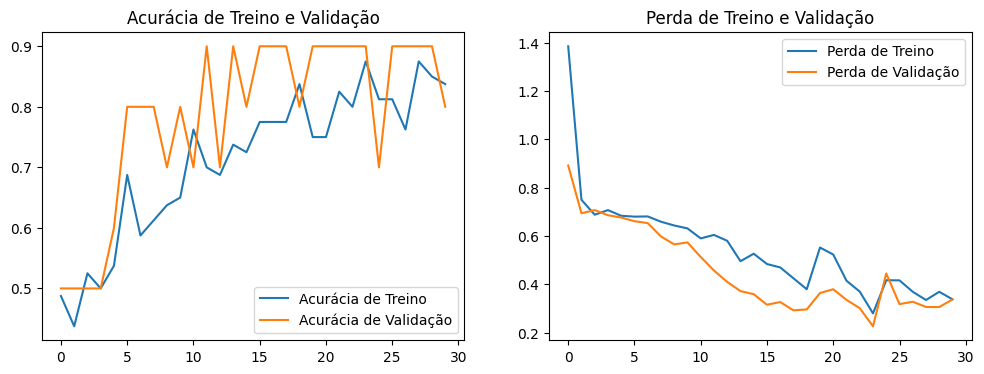

In [50]:
# Avaliar no conjunto de teste
print("\nAvaliando o modelo no conjunto de testes...")
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")
print(f"Perda no conjunto de teste: {test_loss:.4f}")

# Plotar gráficos de acurácia e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

### Teste:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step

Nomes das classes: ['escova_de_dente', 'martelo']


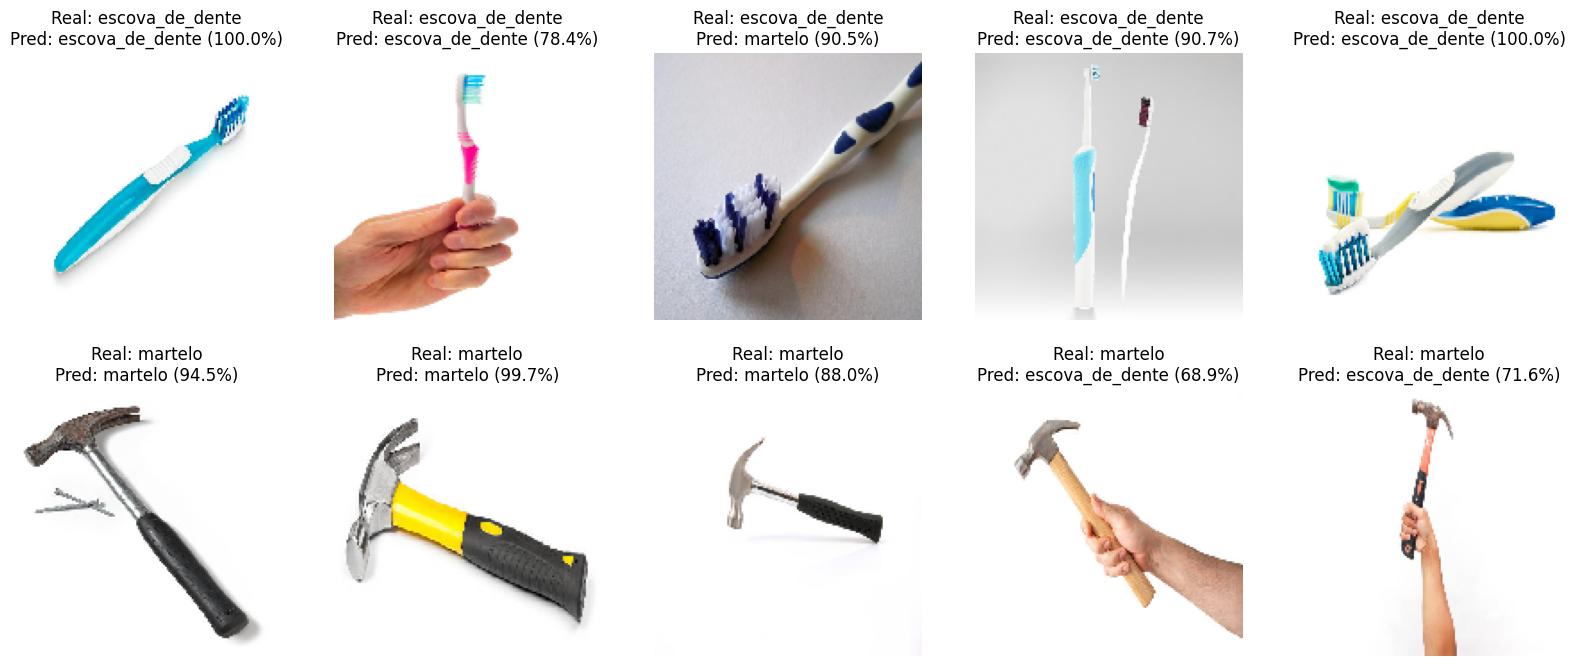

In [51]:
# Fazer predições em algumas imagens de teste
num_images_to_predict = 10 # Quantas imagens de teste você quer ver
test_images, test_labels = next(test_generator) # Pega um batch do gerador de teste

predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten() # 0.5 é o threshold para classificação binária

class_names = list(train_generator.class_indices.keys())
print(f"\nNomes das classes: {class_names}")

plt.figure(figsize=(20, 8))
for i in range(num_images_to_predict):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    true_label = class_names[int(test_labels[i])]
    pred_label = class_names[predicted_classes[i]]
    #LÓGICA PARA CALCULAR A CONFIANÇA
    confidence_score = predictions[i][0] # Pega a probabilidade crua para a imagem atual
    if confidence_score > 0.5:
        display_confidence = confidence_score * 100 # Define a porcentagem de confiança para a classe PREVISTA
    else:
        display_confidence = (1 - confidence_score) * 100
    plt.title(f"Real: {true_label}\nPred: {pred_label} ({display_confidence:.1f}%)")
    plt.axis('off')
plt.show()

## Treinamento CNN com 60 épocas:

In [52]:
with tf.device("/device:GPU:0"):
  epochs = 60 # Número de épocas
  history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size
  )

Epoch 1/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8684 - loss: 0.2536 - val_accuracy: 0.9000 - val_loss: 0.3795
Epoch 2/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.8792 - loss: 0.2445 - val_accuracy: 0.9000 - val_loss: 0.2299
Epoch 3/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.8623 - loss: 0.2536 - val_accuracy: 0.9000 - val_loss: 0.2919
Epoch 4/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8960 - loss: 0.2564 - val_accuracy: 0.9000 - val_loss: 0.2686
Epoch 5/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.8766 - loss: 0.2900 - val_accuracy: 0.9000 - val_loss: 0.3624
Epoch 6/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.8469 - loss: 0.3180 - val_accuracy: 0.9000 - val_loss: 0.2607
Epoch 7/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.8498 - loss: 0.3202 - val_accuracy: 0.9000 - val_loss: 0.3024
Epoch 8/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.8852 - loss: 0.2345 - val_accuracy: 0.9000 - val_loss:

### Validação:


Avaliando o modelo no conjunto de testes...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9000 - loss: 0.2403
Acurácia no conjunto de teste: 0.9000
Perda no conjunto de teste: 0.2403


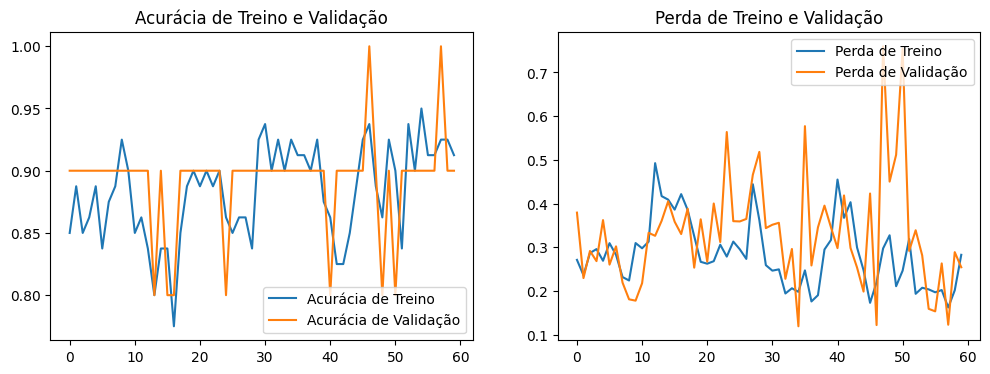

In [53]:
# Avaliar no conjunto de teste
print("\nAvaliando o modelo no conjunto de testes...")
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")
print(f"Perda no conjunto de teste: {test_loss:.4f}")

# Plotar gráficos de acurácia e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

### Teste:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Nomes das classes: ['escova_de_dente', 'martelo']


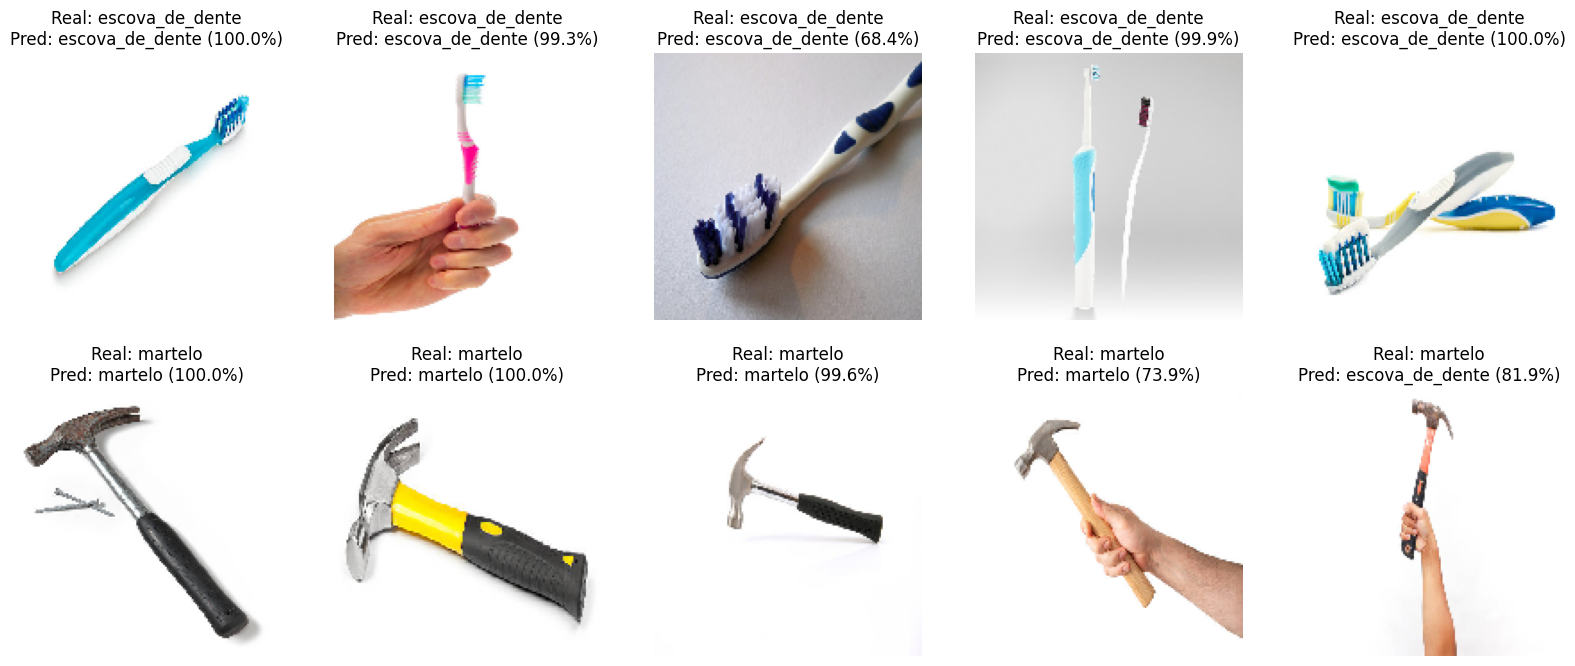

In [54]:
# Fazer predições em algumas imagens de teste
num_images_to_predict = 10 # Quantas imagens de teste você quer ver
test_images, test_labels = next(test_generator) # Pega um batch do gerador de teste

predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten() # 0.5 é o threshold para classificação binária

class_names = list(train_generator.class_indices.keys())
print(f"\nNomes das classes: {class_names}")

plt.figure(figsize=(20, 8))
for i in range(num_images_to_predict):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    true_label = class_names[int(test_labels[i])]
    pred_label = class_names[predicted_classes[i]]
    #LÓGICA PARA CALCULAR A CONFIANÇA
    confidence_score = predictions[i][0] # Pega a probabilidade crua para a imagem atual
    if confidence_score > 0.5:
        display_confidence = confidence_score * 100 # Define a porcentagem de confiança para a classe PREVISTA
    else:
        display_confidence = (1 - confidence_score) * 100
    plt.title(f"Real: {true_label}\nPred: {pred_label} ({display_confidence:.1f}%)")
    plt.axis('off')
plt.show()

## Treinamento CNN com 90 épocas:

In [55]:
with tf.device("/device:GPU:0"):
  epochs = 90 # Número de épocas
  history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size
  )

Epoch 1/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - accuracy: 0.9108 - loss: 0.2846 - val_accuracy: 0.9000 - val_loss: 0.3316
Epoch 2/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.9592 - loss: 0.1552 - val_accuracy: 0.9000 - val_loss: 0.2864
Epoch 3/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9330 - loss: 0.1866 - val_accuracy: 1.0000 - val_loss: 0.1706
Epoch 4/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.9365 - loss: 0.1667 - val_accuracy: 0.9000 - val_loss: 0.4031
Epoch 5/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.9641 - loss: 0.1541 - val_accuracy: 0.9000 - val_loss: 0.2513
Epoch 6/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.9342 - loss: 0.1874 - val_accuracy: 0.9000 - val_loss: 0.2100
Epoch 7/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.9781 - loss: 0.0926 - val_accuracy: 0.9000 - val_loss: 0.2281
Epoch 8/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9375 - loss: 0.2010 - val_accuracy: 0.9000 - val_loss:

### Validação:


Avaliando o modelo no conjunto de testes...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 1.0000 - loss: 0.0016
Acurácia no conjunto de teste: 1.0000
Perda no conjunto de teste: 0.0016


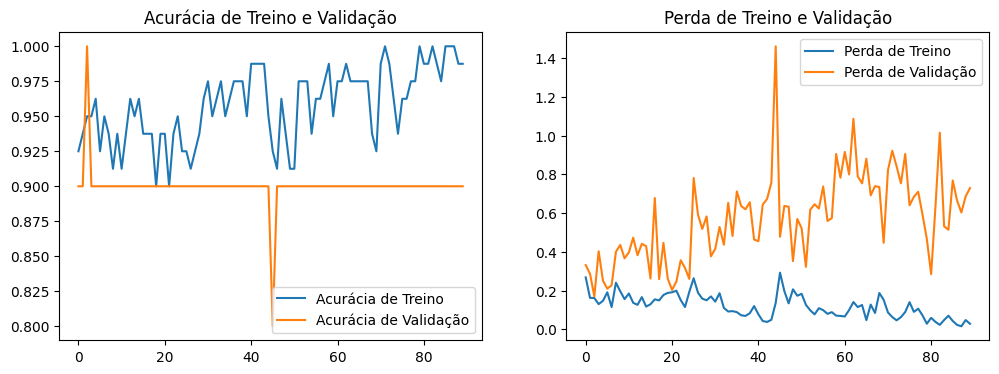

In [56]:
# Avaliar no conjunto de teste
print("\nAvaliando o modelo no conjunto de testes...")
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")
print(f"Perda no conjunto de teste: {test_loss:.4f}")

# Plotar gráficos de acurácia e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

### Teste:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Nomes das classes: ['escova_de_dente', 'martelo']


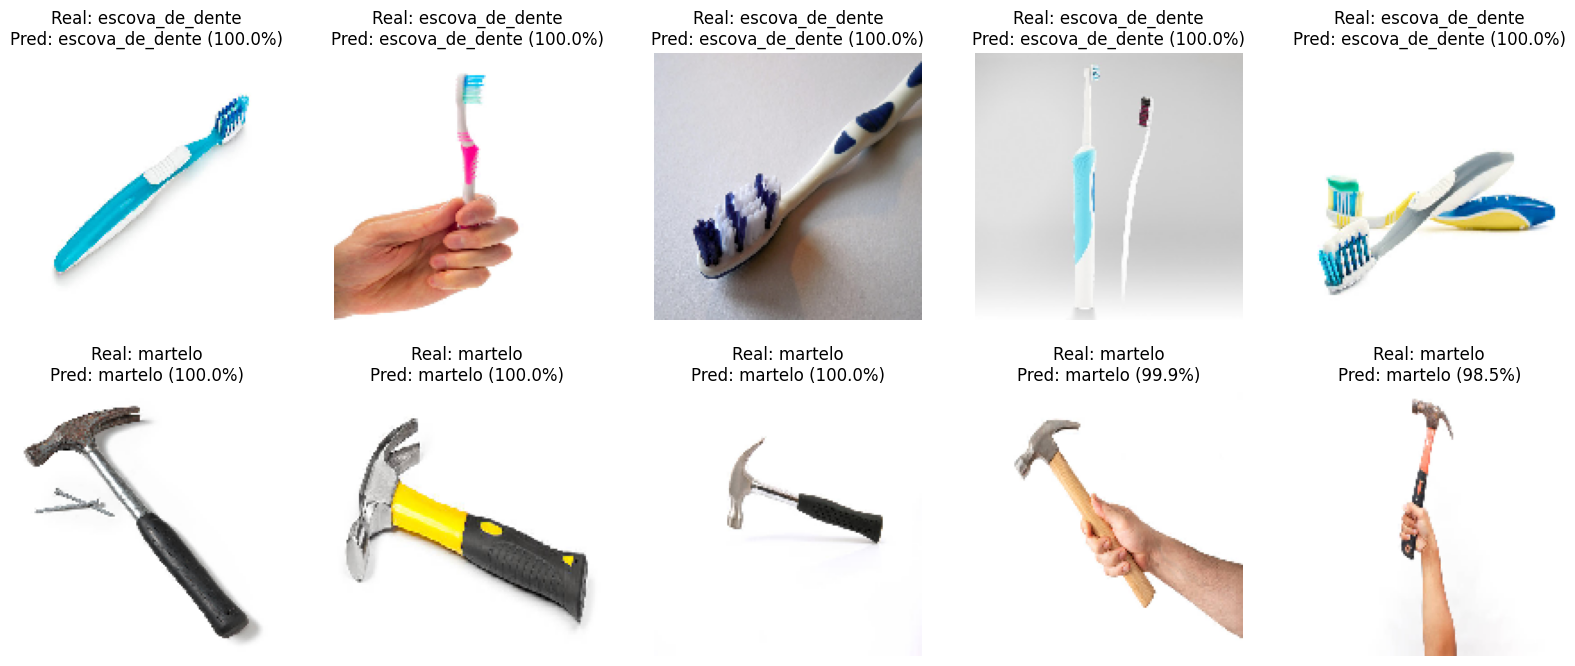

In [57]:
# Fazer predições em algumas imagens de teste
num_images_to_predict = 10 # Quantas imagens de teste você quer ver
test_images, test_labels = next(test_generator) # Pega um batch do gerador de teste

predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten() # 0.5 é o threshold para classificação binária

class_names = list(train_generator.class_indices.keys())
print(f"\nNomes das classes: {class_names}")

plt.figure(figsize=(20, 8))
for i in range(num_images_to_predict):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    true_label = class_names[int(test_labels[i])]
    pred_label = class_names[predicted_classes[i]]
    #LÓGICA PARA CALCULAR A CONFIANÇA
    confidence_score = predictions[i][0] # Pega a probabilidade crua para a imagem atual
    if confidence_score > 0.5:
        display_confidence = confidence_score * 100 # Define a porcentagem de confiança para a classe PREVISTA
    else:
        display_confidence = (1 - confidence_score) * 100
    plt.title(f"Real: {true_label}\nPred: {pred_label} ({display_confidence:.1f}%)")
    plt.axis('off')
plt.show()

## Treinamento CNN com 120 épocas:

In [58]:
with tf.device("/device:GPU:0"):
  epochs = 120 # Número de épocas
  history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size
  )

Epoch 1/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.9804 - loss: 0.0525 - val_accuracy: 0.9000 - val_loss: 0.6067
Epoch 2/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.9545 - loss: 0.0932 - val_accuracy: 0.9000 - val_loss: 0.5459
Epoch 3/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.9845 - loss: 0.0409 - val_accuracy: 0.9000 - val_loss: 0.6425
Epoch 4/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.9898 - loss: 0.0226 - val_accuracy: 0.9000 - val_loss: 0.9579
Epoch 5/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 1.0000 - loss: 0.0278 - val_accuracy: 0.9000 - val_loss: 0.8963
Epoch 6/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.9932 - loss: 0.0245 - val_accuracy: 0.9000 - val_loss: 0.4449
Epoch 7/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9741 - loss: 0.0610 - val_accuracy: 0.9000 - val_loss: 1.2838
Epoch 8/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.9564 - loss: 0.0713 - val_accuracy: 0.9000 - v

### Validação:


Avaliando o modelo no conjunto de testes...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0064
Acurácia no conjunto de teste: 1.0000
Perda no conjunto de teste: 0.0064


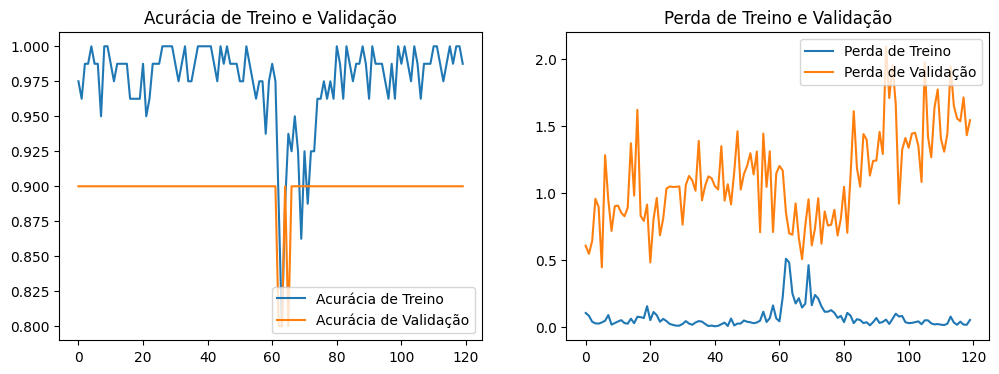

In [59]:
# Avaliar no conjunto de teste
print("\nAvaliando o modelo no conjunto de testes...")
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")
print(f"Perda no conjunto de teste: {test_loss:.4f}")

# Plotar gráficos de acurácia e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

### Teste:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Nomes das classes: ['escova_de_dente', 'martelo']


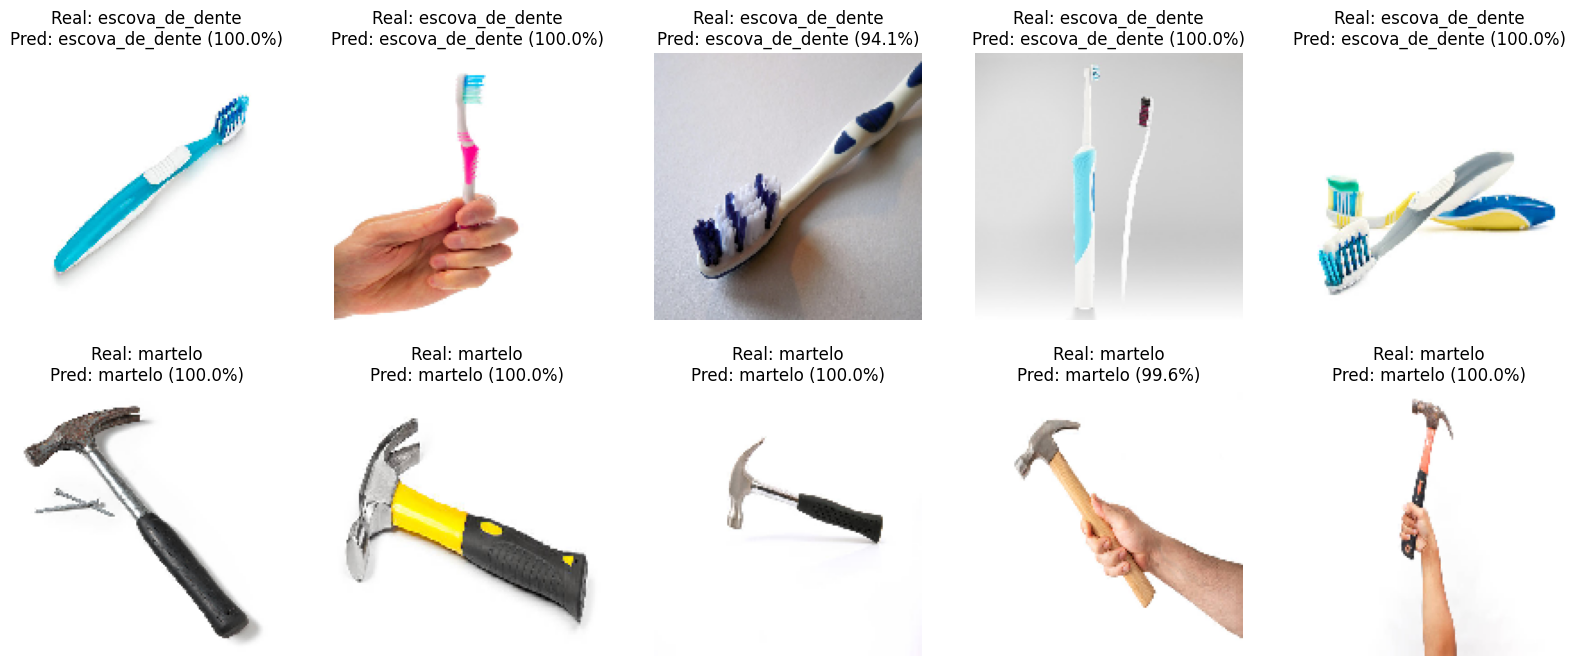

In [60]:
# Fazer predições em algumas imagens de teste
num_images_to_predict = 10 # Quantas imagens de teste você quer ver
test_images, test_labels = next(test_generator) # Pega um batch do gerador de teste

predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten() # 0.5 é o threshold para classificação binária

class_names = list(train_generator.class_indices.keys())
print(f"\nNomes das classes: {class_names}")

plt.figure(figsize=(20, 8))
for i in range(num_images_to_predict):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    true_label = class_names[int(test_labels[i])]
    pred_label = class_names[predicted_classes[i]]
    #LÓGICA PARA CALCULAR A CONFIANÇA
    confidence_score = predictions[i][0] # Pega a probabilidade crua para a imagem atual
    if confidence_score > 0.5:
        display_confidence = confidence_score * 100 # Define a porcentagem de confiança para a classe PREVISTA
    else:
        display_confidence = (1 - confidence_score) * 100
    plt.title(f"Real: {true_label}\nPred: {pred_label} ({display_confidence:.1f}%)")
    plt.axis('off')
plt.show()

In [61]:
model.save('classificador_cnn.keras')# Baixar modelo

# Avaliação modelos CNN Treinada do Zero (Classificação)

Treinado uma CNN para classificar as imagens. A evolução do desempenho com o aumento das épocas é nítida:

* **30 Épocas:** O modelo ainda está confuso, errando a classificação de várias imagens com alta confiança no erro (ex: classifica 3 escovas como martelo, uma com 91.7%). A acurácia de validação é instável e a perda (loss) é alta.
* **60-90 Épocas:** A precisão melhora drasticamente. Os erros se tornam raros e com baixa confiança. As curvas de acurácia sobem e as de perda descem, mostrando que o modelo está aprendendo efetivamente.
* **120 Épocas:** O modelo atinge 100% de acurácia de classificação no seu conjunto de testes. Ele se tornou um classificador perfeito para estas imagens.

**Avaliação:** Esta abordagem é excelente para responder à pergunta: *"Esta imagem contém um martelo ou uma escova de dente?"*. No entanto, ela é incapaz de dizer onde o objeto está na imagem ou de detectar múltiplos objetos.

---

# Análise Geral

## 1. Avaliação Crítica Comparativa

Vamos agora comparar as três soluções com base nos critérios solicitados.

### 1.1. Facilidade de Uso/Integração
* **YOLO Padrão:** O mais fácil. Não requer nenhum treinamento. Basta carregar o modelo pré-treinado e usá-lo para predição. É ideal para prototipagem rápida se seus objetos estiverem nas classes do COCO.
* **YOLO Adaptável:** Dificuldade intermediária. Exige a etapa mais trabalhosa de preparação de dados: coletar imagens e anotar (desenhar caixas) cada objeto. O treinamento em si é simplificado por frameworks como o YOLOv5, mas requer configuração e tempo de processamento.
* **CNN do Zero:** O mais difícil. Exige conhecimento em arquitetura de redes neurais para projetar as camadas (convolucionais, pooling, densas), escolher funções de ativação, otimizadores e gerenciar todo o pipeline de treinamento. A chance de erros na implementação é muito maior.

### 1.2. Precisão do Modelo
* **YOLO Padrão:** Muito baixa. Inútil para o problema específico, pois falha em uma das classes principais (martelo).
* **CNN do Zero:** Alta (para sua tarefa). Atingiu 100% de acurácia de classificação no conjunto de teste com 120 épocas.
* **YOLO Adaptável:** A mais alta (para o problema real). Atingiu 100% de acurácia de detecção e localização com 120 épocas. É a única solução que resolve o problema por completo e com perfeição.

### 1.3. Tempo de Treinamento/Customização
* **YOLO Padrão:** Nenhum. O tempo de customização é zero, pois se usa o modelo "como está".
* **YOLO Adaptável:** Médio. O principal tempo gasto é na anotação manual das imagens. O tempo de treinamento em si pode variar de minutos a horas, dependendo do hardware (GPU) e do tamanho do dataset.
* **CNN do Zero:** Alto. O tempo de treinamento da rede pode ser similar ao do YOLO, mas o tempo de desenvolvimento, depuração e ajuste da arquitetura é significativamente maior.

### 1.4. Tempo de Inferência (Predição)
O tempo de inferência é o tempo que o modelo leva para analisar uma imagem e retornar um resultado. Com base nos seus logs:

* **CNN do Zero:** Provavelmente o mais rápido. Modelos de classificação são estruturalmente mais simples que os de detecção. O seu log de validação mostra ~80ms/step para um lote, o que indica uma inferência por imagem muito rápida (na casa de poucos milissegundos).
* **YOLO Padrão:** Rápido. Seu log `teste_modelo_padrao.png` mostra um tempo de inferência de **20.4ms**.
* **YOLO Adaptável:** Rápido. O log do seu melhor modelo (`teste_modelo_120.png` da entrega anterior) mostra um tempo de inferência de **27.6ms**. É um pouco mais lento que o padrão, mas a diferença é desprezível para a maioria das aplicações em tempo real.

---

## 2. Conclusão Final

| Abordagem | Tarefa | Facilidade | Precisão | Custo (Tempo) | Velocidade | Veredito |
| :--- | :--- | :---: | :---: | :---: | :---: | :--- |
| **YOLO Padrão** | Detecção | ★★★ | ☆☆☆ | ☆☆☆ | ★★☆ | Inadequado. Falha em classes customizadas. |
| **CNN do Zero** | Classificação | ★☆☆ | ★★★ | ★☆☆ | ★★★ | Eficaz, mas incompleto. Responde "o quê", mas não "onde". |
| **YOLO Adaptável**| Detecção | ★★☆ | ★★★ | ★★☆ | ★★☆ | **Solução ideal.** Preciso, completo e resolve o problema real. |


> Para o objetivo de detectar martelos e escovas de dente em imagens, a abordagem de **fine-tuning com o YOLO Adaptável** é, sem dúvida, a melhor solução.
>
> Ainda que exija um trabalho inicial de preparação de dados, o resultado é um modelo especialista, preciso e robusto, que resolve o problema de ponta a ponta. O YOLO Padrão serve como uma boa demonstração de por que modelos generalistas falham em tarefas específicas, e a CNN de classificação, embora precisa em sua tarefa, não atende ao requisito de localização que é inerente à detecção de objetos.

# Predição com Darknet/YOLO

In [62]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 31.22 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolution

In [63]:
!pwd

/content/darknet


In [64]:
!wget https://data.pjreddie.com/files/yolov3.weights

--2025-10-07 01:48:13--  https://data.pjreddie.com/files/yolov3.weights
Resolving data.pjreddie.com (data.pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3030::ac43:b9c7, ...
Connecting to data.pjreddie.com (data.pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  43.0MB/s    in 6.8s    

2025-10-07 01:48:21 (35.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [65]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time
%matplotlib inline
def predictImage():
  image = cv2.imread("/content/darknet/predictions.jpg")
  plt.imshow(cv2.cvtColor(image,
                          cv2.COLOR_BGR2RGB))
  plt.show()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

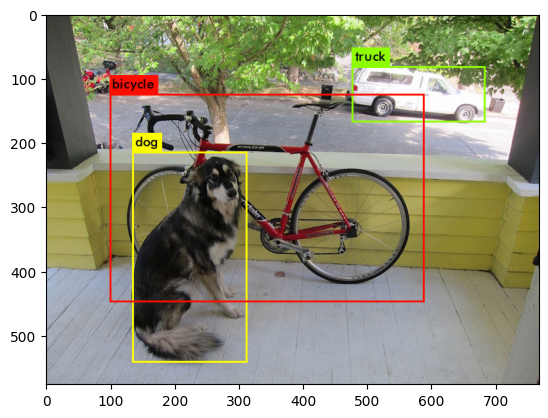

In [66]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
predictImage()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

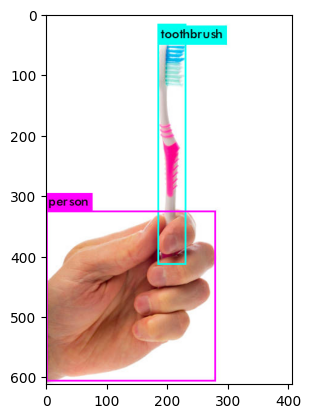

In [67]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/MyDrive/FIAP/Tarefa_Cap_1/test/escova_teste\ \(2\).jpg
predictImage()